In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import time

In [ ]:
new_df=pd.read_csv("ufc-fighters-statistics.csv")
df=new_df.copy() # making a copy...else original file would be change if i make any permanent changes
df

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
0,Robert Drysdale,NaN,7,0,0,190.50,92.99,NaN,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9
1,Daniel McWilliams,The Animal,15,37,0,185.42,83.91,NaN,NaN,NaN,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6
2,Dan Molina,NaN,13,9,0,177.80,97.98,NaN,NaN,NaN,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9
3,Paul Ruiz,NaN,7,4,0,167.64,61.23,NaN,NaN,NaN,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9
4,Collin Huckbody,All In,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,NaN,0,1,0,175.26,106.59,NaN,Orthodox,NaN,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4107,Andre Pederneiras,NaN,1,1,2,172.72,70.31,NaN,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0
4108,Bryson Kamaka,NaN,12,20,1,180.34,77.11,NaN,Orthodox,NaN,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0
4109,Matej Penaz,Money,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   name                                          4111 non-null   object 
 1   nickname                                      2257 non-null   object 
 2   wins                                          4111 non-null   int64  
 3   losses                                        4111 non-null   int64  
 4   draws                                         4111 non-null   int64  
 5   height_cm                                     3813 non-null   float64
 6   weight_in_kg                                  4024 non-null   float64
 7   reach_in_cm                                   2184 non-null   float64
 8   stance                                        3288 non-null   object 
 9   date_of_birth                                 2976 non-null   o

#checking for extreme values

In [ ]:
df[['height_cm','wins','losses','draws','weight_in_kg','reach_in_cm']].describe()

,height_cm,wins,losses,draws,weight_in_kg,reach_in_cm
count,3813.000000,4111.000000,4111.000000,4111.000000,4024.000000,2184.000000
mean,178.234325,12.366821,5.726344,0.264413,77.395825,181.808874
std,8.888050,9.374667,5.103768,0.822373,17.982242,10.680804
min,152.400000,0.000000,0.000000,0.000000,47.630000,147.320000
25%,172.720000,7.000000,2.000000,0.000000,65.770000,175.260000
50%,177.800000,11.000000,5.000000,0.000000,77.110000,182.880000
75%,185.420000,17.000000,8.000000,0.000000,83.910000,190.500000
max,226.060000,253.000000,83.000000,11.000000,349.270000,213.360000


In [ ]:
df[['stance','significant_strikes_landed_per_minute','significant_striking_accuracy','significant_strikes_absorbed_per_minute','significant_strike_defence','average_takedowns_landed_per_15_minutes','takedown_accuracy','takedown_defense','average_submissions_attempted_per_15_minutes']].describe()

,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
count,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000,4111.000000
mean,2.437516,35.542447,3.145206,42.643639,1.250586,26.299927,38.958891,0.610095
std,1.990903,20.398502,2.848502,22.322427,1.935716,28.700980,34.426458,1.505924
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.830000,27.000000,1.550000,36.000000,0.000000,0.000000,0.000000,0.000000
50%,2.330000,40.000000,2.940000,50.000000,0.590000,22.000000,42.000000,0.000000
75%,3.600000,49.000000,4.230000,58.000000,1.940000,45.000000,66.000000,0.700000
max,17.650000,100.000000,52.500000,100.000000,32.140000,100.000000,100.000000,21.900000


In [ ]:
#these are real person ...
df.loc[df["name"] == "Paulo Cesar Silva", "height_cm"] = 218
# change height(226 -> 218)
df[df['height_cm']>213]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
1445,Paulo Cesar Silva,Giant,2,6,0,218.00,174.63,NaN,Orthodox,1963-07-21,0.40,15.0,2.72,47.0,0.42,100.0,16.0,0.4
3822,Hong Man Choi,Techno Goliath,4,5,0,218.44,149.69,NaN,Orthodox,1980-10-30,1.32,26.0,1.46,36.0,0.71,100.0,84.0,0.0


In [ ]:
df[df['weight_in_kg']>200]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
4069,Emmanuel Yarborough,NaN,1,2,0,203.2,270.0,NaN,Open Stance,1960-09-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.loc[df["name"] == "Emmanuel Yarborough", "weight_in_kg"] = 270
# wait was wrong (349.27 -> 270)

In [ ]:
df[df['wins']>50]
#all wins are reals

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
239,Joe Doerksen,El Dirte,51,16,0,182.88,83.91,190.50,Orthodox,1977-10-09,1.43,42.0,2.79,50.0,2.02,33.0,33.0,2.3
284,Dennis Hallman,Superman,53,20,2,175.26,70.31,182.88,Orthodox,1975-12-02,1.12,44.0,1.96,43.0,1.79,30.0,25.0,2.1
349,Ikuhisa Minowa,Minowaman,60,42,8,175.26,82.10,NaN,Orthodox,1976-01-12,0.88,40.0,1.66,49.0,1.82,41.0,5.0,1.9
361,Aleksei Oleinik,The Boa Constrictor,60,17,1,187.96,108.86,203.20,Orthodox,1977-06-20,3.29,48.0,3.80,44.0,1.82,46.0,37.0,1.9
599,Travis Wiuff,The Diesel,75,21,0,190.50,92.99,NaN,Orthodox,1978-03-15,0.48,30.0,4.03,41.0,4.84,57.0,44.0,1.2
675,Jeremy Horn,Gumby,91,22,5,185.42,83.91,187.96,Orthodox,1975-08-25,1.19,39.0,1.99,55.0,1.83,38.0,29.0,1.1
732,Ricco Rodriguez,Suave,53,25,0,193.04,120.20,NaN,Orthodox,1977-08-19,1.85,51.0,1.15,61.0,2.30,39.0,40.0,1.0
1085,Jeff Monson,The Snowman,60,26,1,175.26,112.04,187.96,Orthodox,1971-01-18,0.97,30.0,2.87,59.0,1.06,12.0,66.0,0.7
1246,Igor Vovchanchyn,Ice Cold,55,10,0,172.72,92.99,NaN,Orthodox,1973-08-06,1.59,49.0,0.97,63.0,1.19,66.0,50.0,0.5
1269,Yuki Kondo,NaN,60,33,9,180.34,83.01,NaN,Southpaw,1975-07-17,1.14,42.0,2.57,51.0,0.76,41.0,37.0,0.5


In [ ]:
df[df['losses']>50]

,name,nickname,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes
2018,Dennis Reed,NaN,45,62,1,NaN,92.99,NaN,Orthodox,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2134,Shannon Ritch,The Cannon,56,83,0,175.26,86.18,NaN,Orthodox,1970-09-27,1.0,100.0,6.0,50.0,0.0,0.0,0.0,0.0
3969,Travis Fulton,The Ironman,253,53,10,182.88,108.86,NaN,Orthodox,1977-05-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.fillna(0,inplace=True)
#filling NaN values with 0
df.info()
df['height_cm']=df['height_cm'].replace(0,df['height_cm'].mean())
df['weight_in_kg']=df['weight_in_kg'].replace(0,df['weight_in_kg'].mean())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          4111 non-null   object        
 1   wins                                          4111 non-null   int64         
 2   losses                                        4111 non-null   int64         
 3   draws                                         4111 non-null   int64         
 4   height_cm                                     4111 non-null   float64       
 5   weight_in_kg                                  4111 non-null   float64       
 6   reach_in_cm                                   4111 non-null   float64       
 7   stance                                        4111 non-null   object        
 8   date_of_birth                                 4111 non-null   dateti

In [ ]:
df['date_of_birth']=df['date_of_birth'].astype('datetime64[ns]')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4111 entries, 0 to 4110
Data columns (total 18 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   name                                          4111 non-null   object        
 1   nickname                                      4111 non-null   object        
 2   wins                                          4111 non-null   int64         
 3   losses                                        4111 non-null   int64         
 4   draws                                         4111 non-null   int64         
 5   height_cm                                     4111 non-null   float64       
 6   weight_in_kg                                  4111 non-null   float64       
 7   reach_in_cm                                   4111 non-null   float64       
 8   stance                                        4111 non-null   object

In [ ]:
#removing nickname column because it is unncessary and of no use
df.drop(columns=['nickname'],inplace=True)


In [ ]:
df['age']= pd.Timestamp.now().year-df['date_of_birth'].dt.year

In [ ]:
df


,name,wins,losses,draws,height_cm,weight_in_kg,reach_in_cm,stance,date_of_birth,significant_strikes_landed_per_minute,significant_striking_accuracy,significant_strikes_absorbed_per_minute,significant_strike_defence,average_takedowns_landed_per_15_minutes,takedown_accuracy,takedown_defense,average_submissions_attempted_per_15_minutes,age
0,Robert Drysdale,7,0,0,190.50,92.99,0.00,Orthodox,1981-10-05,0.00,0.0,0.00,0.0,7.32,100.0,0.0,21.9,44
1,Daniel McWilliams,15,37,0,185.42,83.91,0.00,other,1970-01-01,3.36,77.0,0.00,0.0,0.00,0.0,100.0,21.6,55
2,Dan Molina,13,9,0,177.80,97.98,0.00,other,1970-01-01,0.00,0.0,5.58,60.0,0.00,0.0,0.0,20.9,55
3,Paul Ruiz,7,4,0,167.64,61.23,0.00,other,1970-01-01,1.40,33.0,1.40,75.0,0.00,0.0,100.0,20.9,55
4,Collin Huckbody,8,2,0,190.50,83.91,193.04,Orthodox,1994-09-29,2.05,60.0,2.73,42.0,10.23,100.0,0.0,20.4,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4106,John Campetella,0,1,0,175.26,106.59,0.00,Orthodox,1970-01-01,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,55
4107,Andre Pederneiras,1,1,2,172.72,70.31,0.00,Orthodox,1967-03-22,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.0,58
4108,Bryson Kamaka,12,20,1,180.34,77.11,0.00,Orthodox,1970-01-01,9.47,60.0,12.63,0.0,0.00,0.0,100.0,0.0,55
4109,Matej Penaz,6,1,0,190.50,83.91,210.82,Southpaw,1996-10-14,1.28,33.0,2.55,33.0,0.00,0.0,0.0,0.0,29


In [ ]:
df['stance']=df['stance'].replace(0,"other")

<Axes: ylabel='count'>

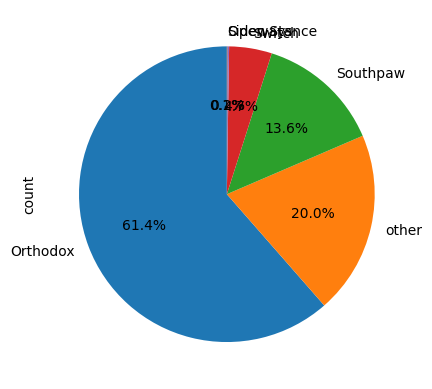

In [ ]:
df['stance'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',    # show percentages
    startangle=90,        # start from top
)


<Axes: xlabel='stance'>

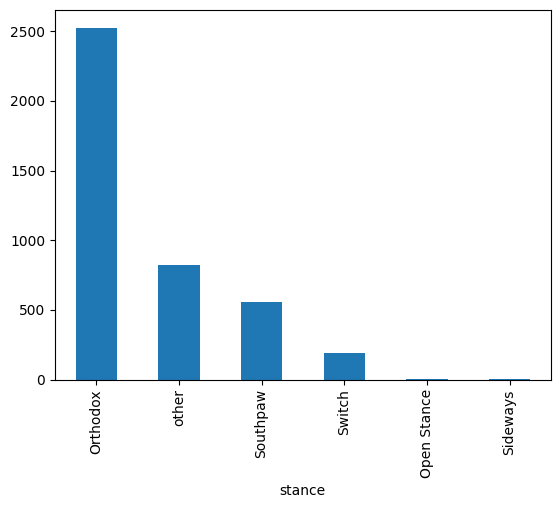

In [ ]:
df['stance'].value_counts().plot(kind='bar')

/tmp/ipython-input-2091036865.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight_in_kg'], ax=ax[0])
/tmp/ipython-input-2091036865.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['height_cm'], ax=ax[1])


<Axes: xlabel='height_cm', ylabel='Density'>

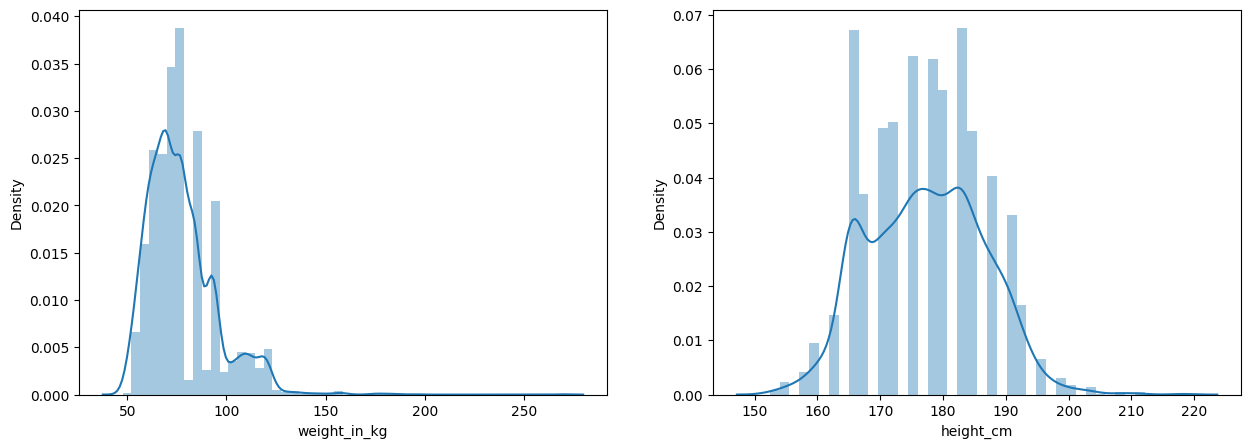

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
sns.distplot(df['weight_in_kg'], ax=ax[0])
sns.distplot(df['height_cm'], ax=ax[1])

In [ ]:
#Top 10 winner of All time
new_df=df.sort_values('wins',ascending=False).head(10)
px.bar(x=new_df['name'],y=new_df['wins'],color=new_df['significant_striking_accuracy'])


<Axes: xlabel='age', ylabel='Count'>

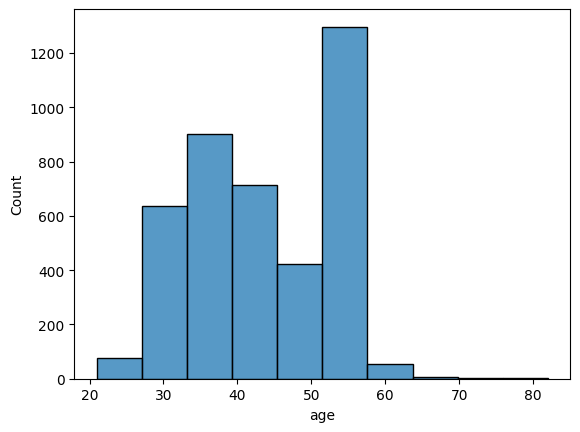

In [ ]:
sns.histplot(df['age'],bins=10)

<Axes: xlabel='age', ylabel='wins'>

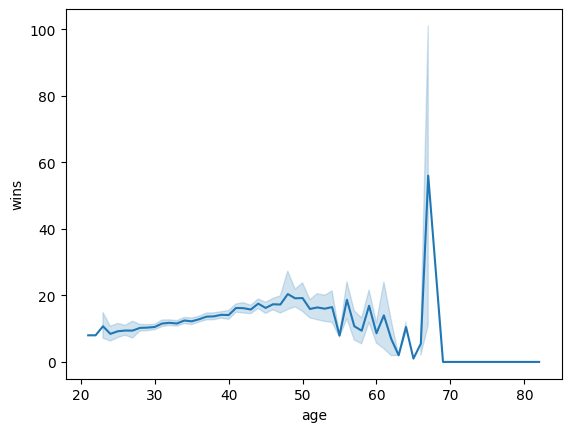

In [ ]:
sns.lineplot(x=df['age'],y=df['wins'])

<Axes: xlabel='height_cm', ylabel='wins'>

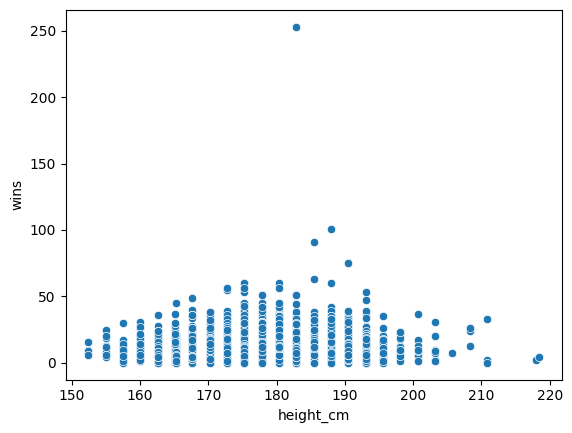

In [ ]:
sns.scatterplot(x=df['height_cm'],y=df['wins'])

<Axes: xlabel='weight_in_kg', ylabel='wins'>

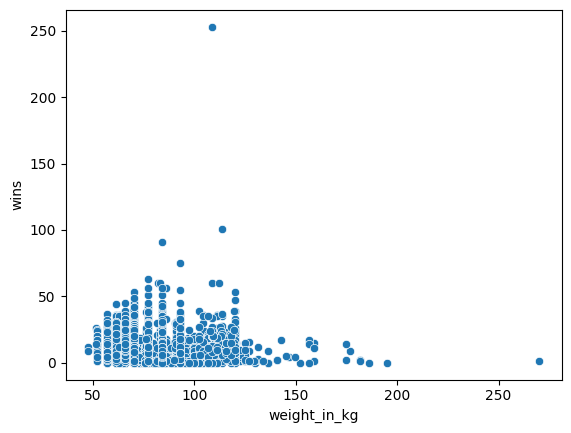

In [ ]:
sns.scatterplot(x=df['weight_in_kg'],y=df['wins'])

<Axes: xlabel='significant_striking_accuracy', ylabel='wins'>

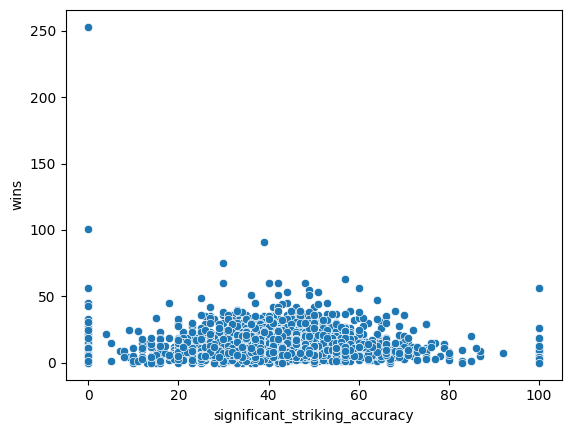

In [ ]:
sns.scatterplot(x=df['significant_striking_accuracy'],y=df['wins'])

<Axes: xlabel='significant_strikes_landed_per_minute', ylabel='wins'>

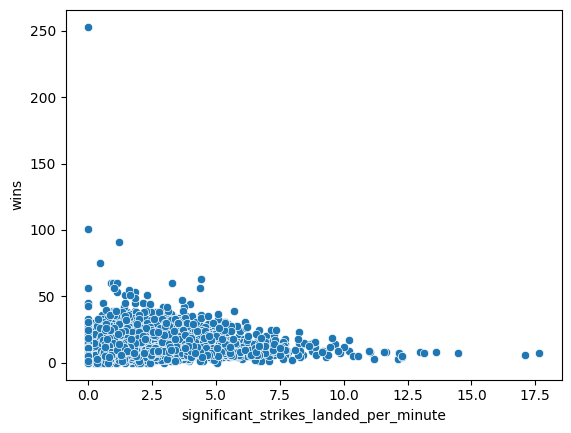

In [ ]:
sns.scatterplot(x=df['significant_strikes_landed_per_minute'],y=df['wins'])

<Axes: xlabel='significant_strike_defence', ylabel='wins'>

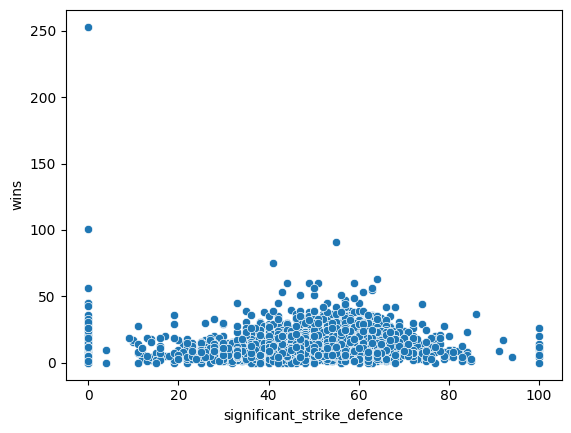

In [ ]:
sns.scatterplot(x=df['significant_strike_defence'],y=df['wins'])

In [ ]:
#Top 10 Fighters with highest significant strikes landed per minute
new_df=df.sort_values('significant_strikes_landed_per_minute',ascending=False).head(10)
px.bar(new_df,x='name',y='significant_strikes_landed_per_minute',color='wins')


In [ ]:
# Fighters with highest striking accuracy
new_df=df.sort_values('significant_striking_accuracy',ascending=False).head(10)
px.bar(new_df,x='name',y='significant_striking_accuracy',color='wins')

In [ ]:
#Creating new column
df["win/loss_ratio"]=df['wins']/df['losses'].replace(0,1)
new_df=df.sort_values('win/loss_ratio',ascending=False).head(10)
px.bar(new_df,x='name',y='win/loss_ratio')


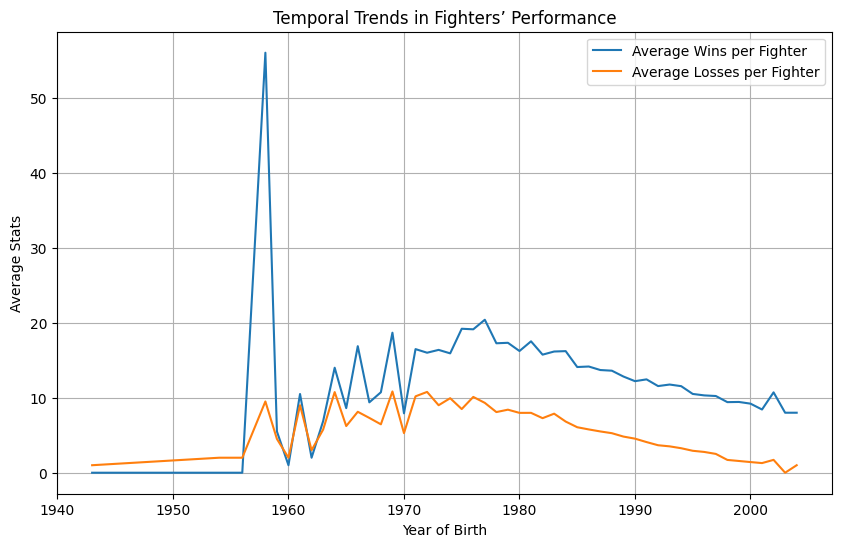

In [ ]:
df['year'] = df['date_of_birth'].dt.year
yearly_stats = df.groupby('year')[['wins', 'losses']].mean()

plt.figure(figsize=(10,6))
plt.plot(yearly_stats.index, yearly_stats['wins'], label='Average Wins per Fighter')
plt.plot(yearly_stats.index, yearly_stats['losses'], label='Average Losses per Fighter')

plt.xlabel("Year of Birth")
plt.ylabel("Average Stats")
plt.title("Temporal Trends in Fighters’ Performance")
plt.legend()
plt.show()